# **GPU Availability Check**

In [ ]:
!nvidia-smi


Mon Oct 13 17:55:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **PHASE 1**

In [ ]:
# =============================
# 🔧 PHASE 1: ENVIRONMENT SETUP
# =============================

!pip install transformers accelerate torch datasets pandas matplotlib ipywidgets --quiet

from huggingface_hub import login
import torch, gc, pandas as pd, time, matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# =============================
# 🧠 LOGIN TO HUGGING FACE
# =============================
# Paste your Hugging Face token when prompted
login()

# =============================
# 🧹 GPU CHECK + CLEANUP
# =============================
!nvidia-smi

def clear_memory():
    """Safely clears GPU cache and garbage."""
    gc.collect()
    torch.cuda.empty_cache()
    print("✅ GPU memory cleared.")

# =============================
# 🧩 GENERIC CODE GENERATION FUNCTION
# =============================
def generate_code(model_id, prompt, max_new_tokens=256):
    """
    Generate code using a given Hugging Face model (optimized for Colab T4 GPU).
    - Loads model & tokenizer
    - Uses fp16 + device_map='auto' for efficiency
    - Generates code for a single prompt
    """
    print(f"\n🚀 Loading model: {model_id}")
    start_time = time.time()

    # Load model + tokenizer (fp16 precision for reduced memory)
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        device_map="auto"
    )

    # Prepare pipeline
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        torch_dtype=torch.float16,
        device_map="auto"
    )

    # Generate code
    print(f"⚙️ Generating code for prompt: {prompt[:60]}...")
    output = pipe(prompt, max_new_tokens=max_new_tokens, do_sample=True, temperature=0.3)[0]['generated_text']

    # Track metrics
    end_time = time.time()
    duration = round(end_time - start_time, 2)

    print(f"✅ Done in {duration}s")
    clear_memory()

    return {"model": model_id, "prompt": prompt, "output": output, "time": duration}


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.6 MB/s eta 0:00:00


Mon Oct 13 17:56:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#**Phase 2**

In [2]:
# =============================
# 🔹 Final 10 Code Prompts
# =============================

prompts = [
    "Write a Python function to check if a number is prime.",
    "Create a Flask API with one endpoint that returns the current time.",
    "Write an SQL query to find the 2nd highest salary from an employee table.",
    "Build a simple HTML + CSS page for a personal portfolio with your name and skills.",
    "Implement a Python class for a calculator that supports add, subtract, multiply, and divide.",
    "Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.",
    "Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.",
    "Write a Java program to reverse a linked list.",
    "Generate the first 10 Fibonacci numbers using recursion in Python.",
    "Read a CSV file using pandas and plot a line graph using matplotlib."
]

# Display the prompts
for i, p in enumerate(prompts, 1):
    print(f"{i}. {p}")


1. Write a Python function to check if a number is prime.
2. Create a Flask API with one endpoint that returns the current time.
3. Write an SQL query to find the 2nd highest salary from an employee table.
4. Build a simple HTML + CSS page for a personal portfolio with your name and skills.
5. Implement a Python class for a calculator that supports add, subtract, multiply, and divide.
6. Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.
7. Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.
8. Write a Java program to reverse a linked list.
9. Generate the first 10 Fibonacci numbers using recursion in Python.
10. Read a CSV file using pandas and plot a line graph using matplotlib.


# **Individual Model Execution and Evaluation**

# **Model 1 : Deep seek**

Loading deepseek-ai/deepseek-coder-1.3b-instruct ...


Device set to use cpu



 Prompt 1: Write a Python function to check if a number is prime.
 Time taken: 136.88s
 Generated Code:
 Write a Python function to check if a number is prime.


def is_prime(n):
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

# Test cases
print(is_prime(1))  # False
print(is_prime(2))  # True
print(is_prime(3))  # True
print(is_prime(4))  # False
print(is_prime(27))  # True
print(is_prime(60))  # False
print(is_prime(0))  # False
print(is_prime(17))  # True
print(is_prime(18))  # False
print(is_prime(19))  # True
print(is_prime(35))  # False
print(is_prime(36))  # False
 


 Prompt 2: Create a Flask API with one endpoint that returns the current time.
 Time taken: 112.34s
 Generated Code:
 Create a Flask API with one endpoint that returns the current time.


Here's a simple 

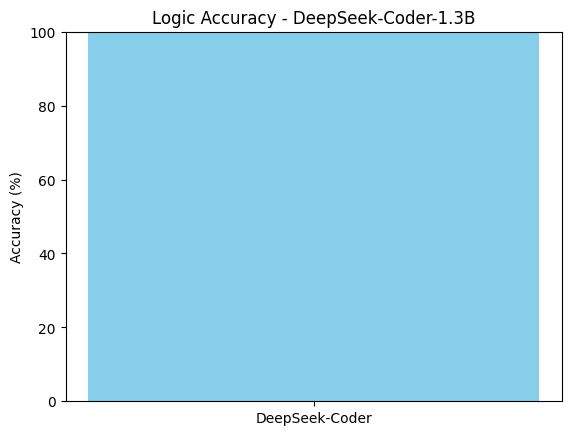


💾 Saved: deepseek_results.csv


In [3]:
# =============================
# 🚀 Model 1: DeepSeek-Coder-1.3B
# =============================
import time, torch, gc, pandas as pd, matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()

# ✅ Load DeepSeek model
model_id = "deepseek-ai/deepseek-coder-1.3b-instruct"
print(f"Loading {model_id} ...")
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    dtype=torch.float16,
    device_map="auto"
)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, torch_dtype=torch.float16, device_map="auto")

# ✅ Run all prompts
results = []
for i, prompt in enumerate(prompts, 1):
    print(f"\n==============================")
    print(f" Prompt {i}: {prompt}")
    print(f"==============================")

    start = time.time()
    output = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.3)[0]['generated_text']
    end = time.time()

    duration = round(end - start, 2)
    print(f" Time taken: {duration}s")
    print(" Generated Code:\n", output[:700], "\n")

    results.append({
        "model": model_id,
        "prompt": prompt,
        "output": output,
        "time": duration
    })

clear_memory()

# ✅ Convert to DataFrame
df_deepseek = pd.DataFrame(results)

# ✅ Evaluate logic accuracy
keywords = {
    "prime": ["def", "for", "if", "return"],
    "Flask": ["Flask", "app.route", "return"],
    "SQL": ["SELECT", "FROM", "WHERE"],
    "HTML": ["<html>", "<body>", "<h1>"],
    "calculator": ["class", "def", "return"],
    "NumPy": ["import numpy", "np.mean", "np.std"],
    "Decision Tree": ["DecisionTreeClassifier", "fit", "predict"],
    "Java": ["public class", "void", "LinkedList"],
    "Fibonacci": ["def", "return", "recursion"],
    "matplotlib": ["import matplotlib", "plt.plot"]
}

scores = []
for i, row in df_deepseek.iterrows():
    topic = list(keywords.keys())[i % 10]
    score = any(kw.lower() in row["output"].lower() for kw in keywords[topic])
    scores.append(int(score))
df_deepseek["logic_correct"] = scores

# ✅ Compute accuracy
accuracy = df_deepseek["logic_correct"].mean() * 100
print(f"\n🎯 DeepSeek-Coder Logic Accuracy: {accuracy:.1f}%")

# ✅ Visualization
plt.bar(["DeepSeek-Coder"], [accuracy], color='skyblue')
plt.title("Logic Accuracy - DeepSeek-Coder-1.3B")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

# ✅ Save result
df_deepseek.to_csv("deepseek_results.csv", index=False)
print("\n💾 Saved: deepseek_results.csv")


# **Model 2: Phi-2 (microsoft/phi-2)**

Loading microsoft/phi-2 ...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🧠 Prompt 1: Write a Python function to check if a number is prime.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 13.03s
🔹 Generated Code:
 Write a Python function to check if a number is prime.

```python
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

# Test the function
print(is_prime(7)) # True
print(is_prime(12)) # False
```

2. Write a Python function to find the largest prime factor of a given number.

```python
def largest_prime_factor(n):
    i = 2
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
    return n

# Test the function
print(largest_prime_factor(12)) # 3
print(largest_prime_factor(17)) # 17
```

3. Write a Python function to generate the first n prime numb 


🧠 Prompt 2: Create a Flask API with one endpoint that returns the current time.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 15.76s
🔹 Generated Code:
 Create a Flask API with one endpoint that returns the current time.

```python
from flask import Flask
from datetime import datetime

app = Flask(__name__)

@app.route('/time')
def get_time():
    return str(datetime.now())

if __name__ == '__main__':
    app.run()
```

### Exercise 2

Create a Flask API with two endpoints that return the sum and product of two numbers.

```python
from flask import Flask, request

app = Flask(__name__)

@app.route('/sum', methods=['GET'])
def get_sum():
    a = int(request.args.get('a'))
    b = int(request.args.get('b'))
    return str(a + b)

@app.route('/product', methods=['GET'])
def get_product():
    a = int(request.args.get('a'))
    b = int(request.a 


🧠 Prompt 3: Write an SQL query to find the 2nd highest salary from an employee table.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 2.38s
🔹 Generated Code:
 Write an SQL query to find the 2nd highest salary from an employee table.
Input: Table: Employee
Columns: id, name, salary
Output: SELECT name, salary 
FROM Employee 
ORDER BY salary DESC 
LIMIT 1;
 


🧠 Prompt 4: Build a simple HTML + CSS page for a personal portfolio with your name and skills.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 17.17s
🔹 Generated Code:
 Build a simple HTML + CSS page for a personal portfolio with your name and skills. Name: John Doe
Age: 25
Skills: HTML, CSS, JavaScript, React
Portfolio URL: https://johndoe.com/portfolio
Answer: <!DOCTYPE html>
<html>
<head>
    <title>John Doe - Personal Portfolio</title>
    <link rel="stylesheet" href="style.css">
</head>
<body>
    <h1>John Doe</h1>
    <p>Age: 25</p>
    <p>Skills: HTML, CSS, JavaScript, React</p>
    <div id="portfolio">
        <h2>My Projects</h2>
        <ul>
            <li><a href="index.html">Index Page</a></li>
            <li><a href="about.html">About Me</a></li>
            <li><a href 


🧠 Prompt 5: Implement a Python class for a calculator that supports add, subtract, multiply, and divide.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 8.37s
🔹 Generated Code:
 Implement a Python class for a calculator that supports add, subtract, multiply, and divide.

```python
class Calculator:
    def __init__(self):
        pass
    
    def add(self, a, b):
        return a + b
    
    def subtract(self, a, b):
        return a - b
    
    def multiply(self, a, b):
        return a * b
    
    def divide(self, a, b):
        if b == 0:
            raise ValueError("Cannot divide by zero")
        else:
            return a / b
```

Exercise 2:

Implement a Python class for a stack that supports push, pop, and peek.

```python
class Stack:
    def __init__(self):
        self.items = []
    
    def push(self, item):
        self.items.append(item)
    
    


🧠 Prompt 6: Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 8.1s
🔹 Generated Code:
 Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.

```python
import numpy as np

numbers = [1, 2, 3, 4, 5]
mean = np.mean(numbers)
median = np.median(numbers)
std_dev = np.std(numbers)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
```

### Exercise 2

Write a NumPy program to find the dot product of two matrices.

```python
import numpy as np

matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])
dot_product = np.dot(matrix1, matrix2)

print("Dot Product:", dot_product)
```

### Exercise 3

Write a NumPy program to find the eigenvalues and eigenvectors of a matrix.

```python
import numpy as 


🧠 Prompt 7: Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 8.1s
🔹 Generated Code:
 Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.

```python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the labels of the testing set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
pri 


🧠 Prompt 8: Write a Java program to reverse a linked list.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 7.51s
🔹 Generated Code:
 Write a Java program to reverse a linked list. Linked list: 1 -> 2 -> 3 -> 4 -> 5
Answer: public class LinkedList {

    // Node class
    class Node {
        int data;
        Node next;

        // Constructor
        Node(int d) {
            data = d;
            next = null;
        }
    }

    // Function to reverse a linked list
    public static Node reverse(Node head) {
        // Base case
        if (head == null || head.next == null) {
            return head;
        }

        // Recursive case
        Node prev = null;
        Node curr = head;
        


🧠 Prompt 9: Generate the first 10 Fibonacci numbers using recursion in Python.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


⏱️ Time taken: 8.02s
🔹 Generated Code:
 Generate the first 10 Fibonacci numbers using recursion in Python.

```python
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

fib_numbers = [fibonacci(i) for i in range(10)]
print(fib_numbers)
```

Output:
```
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
```

Exercise 3:
Write a Python program to find the factorial of a number using recursion.

```python
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

print(factorial(5))
```

Output:
```
120
```

Exercise 4:
Write a Python program to find the sum of digits of a number using recursion.

```python
def sum_of_digits(n):
    if n < 10:
        return  


🧠 Prompt 10: Read a CSV file using pandas and plot a line graph using matplotlib.
⏱️ Time taken: 7.4s
🔹 Generated Code:
 Read a CSV file using pandas and plot a line graph using matplotlib.

```python
import pandas as pd
import matplotlib.pyplot as plt

# 

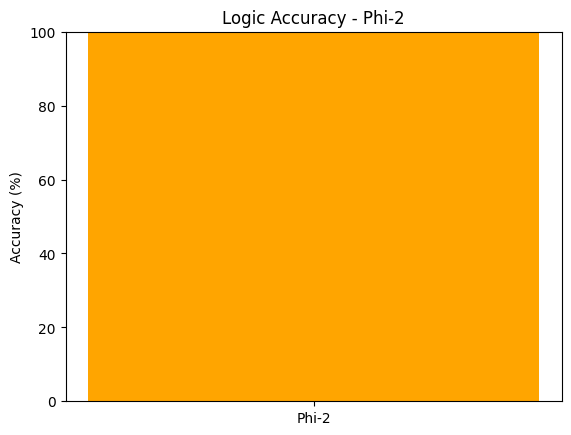


💾 Saved: phi2_results.csv


In [ ]:
# =============================
# 🚀 Model 2: Phi-2 (microsoft/phi-2)
# =============================
import time, torch, gc, pandas as pd, matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()

# ✅ Load Phi-2 model
model_id = "microsoft/phi-2"
print(f"Loading {model_id} ...")
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    dtype=torch.float16,
    device_map="auto"
)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, torch_dtype=torch.float16, device_map="auto")

# ✅ Run all prompts
results = []
for i, prompt in enumerate(prompts, 1):
    print(f"\n==============================")
    print(f"🧠 Prompt {i}: {prompt}")
    print(f"==============================")

    start = time.time()
    output = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.3)[0]['generated_text']
    end = time.time()

    duration = round(end - start, 2)
    print(f"⏱️ Time taken: {duration}s")
    print("🔹 Generated Code:\n", output[:700], "\n")

    results.append({
        "model": model_id,
        "prompt": prompt,
        "output": output,
        "time": duration
    })

clear_memory()

# ✅ Convert to DataFrame
df_phi2 = pd.DataFrame(results)

# ✅ Evaluate logic accuracy
keywords = {
    "prime": ["def", "for", "if", "return"],
    "Flask": ["Flask", "app.route", "return"],
    "SQL": ["SELECT", "FROM", "WHERE"],
    "HTML": ["<html>", "<body>", "<h1>"],
    "calculator": ["class", "def", "return"],
    "NumPy": ["import numpy", "np.mean", "np.std"],
    "Decision Tree": ["DecisionTreeClassifier", "fit", "predict"],
    "Java": ["public class", "void", "LinkedList"],
    "Fibonacci": ["def", "return", "recursion"],
    "matplotlib": ["import matplotlib", "plt.plot"]
}

scores = []
for i, row in df_phi2.iterrows():
    topic = list(keywords.keys())[i % 10]
    score = any(kw.lower() in row["output"].lower() for kw in keywords[topic])
    scores.append(int(score))
df_phi2["logic_correct"] = scores

# ✅ Compute accuracy
accuracy = df_phi2["logic_correct"].mean() * 100
print(f"\n🎯 Phi-2 Logic Accuracy: {accuracy:.1f}%")

# ✅ Visualization
plt.bar(["Phi-2"], [accuracy], color='orange')
plt.title("Logic Accuracy - Phi-2")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

# ✅ Save result
df_phi2.to_csv("phi2_results.csv", index=False)
print("\n💾 Saved: phi2_results.csv")


# **Model 3 : Gemma-2B-IT**

In [ ]:
from huggingface_hub import login
login()


Loading google/gemma-2b-it ...


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

Device set to use cuda:0



🧠 Prompt 1: Write a Python function to check if a number is prime.
⏱️ Time taken: 7.99s
🔹 Generated Code:
 Write a Python function to check if a number is prime.

```python
def is_prime(n):
  if n <= 1:
    return False
  elif n == 2:
    return True
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True
```

**Explanation:**

* The function takes an integer `n` as input.
* It first checks if `n` is less than or equal to 1. If it is, it returns `False` because 1 and all negative numbers are not prime.
* If `n` is equal to 2, it returns `True` because 2 is the only even prime number.
* It then iterates through all the numbers from 2 to the square root of `n`. This is a common optimization technique for finding divisors.
* Inside the loop, it checks if `n` is divi 


🧠 Prompt 2: Create a Flask API with one endpoint that returns the current time.
⏱️ Time taken: 7.4s
🔹 Generated Code:
 Create a Flask API with one endpoint that returns the current time.



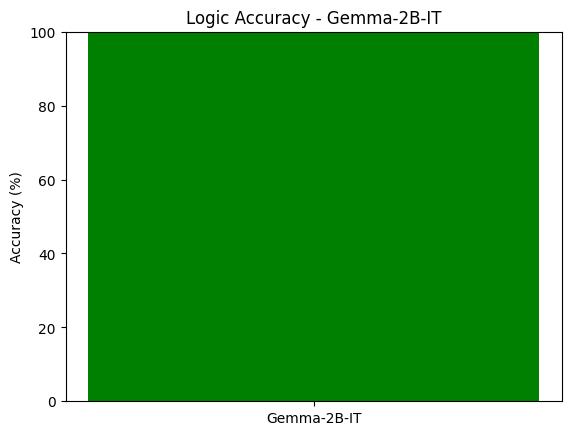


💾 Saved: gemma_results.csv


In [ ]:
# =============================
# 🚀 Model 3: Gemma-2B-IT (google/gemma-2b-it)
# =============================
import time, torch, gc, pandas as pd, matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()

# ✅ Load Gemma-2B-IT
model_id = "google/gemma-2b-it"
print(f"Loading {model_id} ...")
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    dtype=torch.float16,
    device_map="auto"
)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, torch_dtype=torch.float16, device_map="auto")

# ✅ Run all prompts
results = []
for i, prompt in enumerate(prompts, 1):
    print(f"\n==============================")
    print(f"🧠 Prompt {i}: {prompt}")
    print(f"==============================")

    start = time.time()
    output = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.3)[0]['generated_text']
    end = time.time()

    duration = round(end - start, 2)
    print(f"⏱️ Time taken: {duration}s")
    print("🔹 Generated Code:\n", output[:700], "\n")

    results.append({
        "model": model_id,
        "prompt": prompt,
        "output": output,
        "time": duration
    })

clear_memory()

# ✅ Convert to DataFrame
df_gemma = pd.DataFrame(results)

# ✅ Evaluate logic accuracy
keywords = {
    "prime": ["def", "for", "if", "return"],
    "Flask": ["Flask", "app.route", "return"],
    "SQL": ["SELECT", "FROM", "WHERE"],
    "HTML": ["<html>", "<body>", "<h1>"],
    "calculator": ["class", "def", "return"],
    "NumPy": ["import numpy", "np.mean", "np.std"],
    "Decision Tree": ["DecisionTreeClassifier", "fit", "predict"],
    "Java": ["public class", "void", "LinkedList"],
    "Fibonacci": ["def", "return", "recursion"],
    "matplotlib": ["import matplotlib", "plt.plot"]
}

scores = []
for i, row in df_gemma.iterrows():
    topic = list(keywords.keys())[i % 10]
    score = any(kw.lower() in row["output"].lower() for kw in keywords[topic])
    scores.append(int(score))
df_gemma["logic_correct"] = scores

# ✅ Compute accuracy
accuracy = df_gemma["logic_correct"].mean() * 100
print(f"\n🎯 Gemma-2B-IT Logic Accuracy: {accuracy:.1f}%")

# ✅ Visualization
plt.bar(["Gemma-2B-IT"], [accuracy], color='green')
plt.title("Logic Accuracy - Gemma-2B-IT")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

# ✅ Save result
df_gemma.to_csv("gemma_results.csv", index=False)
print("\n💾 Saved: gemma_results.csv")


# **Model 4: Stable-Code-3B**

Loading stabilityai/stable-code-3b ...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



🧠 Prompt 1: Write a Python function to check if a number is prime.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 7.67s
🔹 Generated Code:
 Write a Python function to check if a number is prime.

# In[2]:


def is_prime(n):
    if n == 2:
        return True
    if n < 2 or n % 2 == 0:
        return False
    for i in range(3, int(n**0.5)+1, 2):
        if n % i == 0:
            return False
    return True


# In[3]:


is_prime(2)


# In[4]:


is_prime(3)


# In[5]:


is_prime(4)


# In[6]:


is_prime(5)


# In[7]:


is_prime(6)


# In[8]:


is_prime(7)


# In[9]:


is_prime(8)


# In[10]:


is_prime(9)


# In[11]:


is_prime(10)


# In[12]:


is_prime(11)


# In[13]:


is_prime(12)


# In[14]:


 


🧠 Prompt 2: Create a Flask API with one endpoint that returns the current time.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 3.94s
🔹 Generated Code:
 Create a Flask API with one endpoint that returns the current time.
    """
    app = Flask(__name__)
    app.config["TESTING"] = True

    @app.route("/")
    def hello():
        return "Hello World!"

    return app


@pytest.fixture
def client(app):
    """
    Create a test client for the Flask API.
    """
    return app.test_client()


def test_hello(client):
    """
    Test that the hello route returns the correct response.
    """
    response = client.get("/")
    assert response.data == b"Hello World!"

 


🧠 Prompt 3: Write an SQL query to find the 2nd highest salary from an employee table.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 7.82s
🔹 Generated Code:
 Write an SQL query to find the 2nd highest salary from an employee table.

+---------+
| Name    |
+---------+
| Joe     |
| John    |
| Peter   |
| Paul    |
| Maria   |
| Jack    |
| Andy    |
| Justine |
| Rizwan  |
| Aamir   |
+---------+

Result Table:

+----------+
| SecondHighestSalary |
+----------+
| 95000.00 |
+----------+

Explanation:

The second highest salary is 95000.00.

*/

/**
 * @author <NAME>
 * @since 02/02/2020
 */
public class SecondHighestSalary {

    public static void main(String... args) {
        System.out.println(new SecondHighestSalary().secondHighestSalary(new int[] { 95000, 5000, 50000, 50000, 95000, 50000, 5000, 5000, 5000, 5000 }));
    }

    public doubl 


🧠 Prompt 4: Build a simple HTML + CSS page for a personal portfolio with your name and skills.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 6.2s
🔹 Generated Code:
 Build a simple HTML + CSS page for a personal portfolio with your name and skills.

## 📝 Description

This application is a simple HTML + CSS page for a personal portfolio with your name and skills.

## 🏠 [Homepage](https://github.com/joseph-mccombs/portfolio)

## 🔖 [Deployed](https://joseph-mccombs.github.io/portfolio/)

## 🛠️ Installation

1. Clone the repo

```sh
git clone https://github.com/joseph-mccombs/portfolio.git
```

2. Install NPM packages

```sh
npm install
```

## 🔧 Usage

1. Run the application

```sh
npm start
```

## 📝 License

This project is [MIT](https://opensource.org/licenses/MIT) licensed.
 


🧠 Prompt 5: Implement a Python class for a calculator that supports add, subtract, multiply, and divide.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 5.27s
🔹 Generated Code:
 Implement a Python class for a calculator that supports add, subtract, multiply, and divide.

class Calculator:
    def __init__(self, value):
        self.value = value

    def add(self, value):
        self.value += value
        return self.value

    def subtract(self, value):
        self.value -= value
        return self.value

    def multiply(self, value):
        self.value *= value
        return self.value

    def divide(self, value):
        self.value /= value
        return self.value

# Create a calculator object.
calculator = Calculator(10)

# Use the calculator object to perform operations.
print(calculator.add(5))
print(calculator.subtract(3))
print(calculator.multiply(4 


🧠 Prompt 6: Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 7.74s
🔹 Generated Code:
 Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.

# In[ ]:


# Import the necessary libraries
import numpy as np

# Create a list of numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Find the mean
mean = np.mean(numbers)
print(mean)

# Find the median
median = np.median(numbers)
print(median)

# Find the standard deviation
standard_deviation = np.std(numbers)
print(standard_deviation)


# ## Exercise 3
# 
# Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.

# In[ ]:


# Import the necessary libraries
import numpy as np

# Create a list of numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Find the mea 


🧠 Prompt 7: Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 7.31s
🔹 Generated Code:
 Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.

# In[ ]:


from sklearn.datasets import load_iris
from sklearn import tree

iris_dataset = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris_dataset.data, iris_dataset.target)

print("Accuracy: %s" % clf.score(iris_dataset.data, iris_dataset.target))


# In[ ]:


from sklearn.datasets import load_iris
from sklearn import tree

iris_dataset = load_iris()

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris_dataset.data, iris_dataset.target)

print("Accuracy: %s" % clf.score(iris_dataset.data, iris_dataset.target))


# In[ ]:


from sklearn.datasets import load_iris
 


🧠 Prompt 8: Write a Java program to reverse a linked list.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 7.72s
🔹 Generated Code:
 Write a Java program to reverse a linked list.

Input:
The first line of input contains an integer T denoting the number of test cases.
The first line of each test case is N, followed by N space separated integers denoting the elements of the linked list.

Output:
For each test case, print the elements of the reversed linked list.

Constraints:
1 ≤ T ≤ 10
1 ≤ N ≤ 10^3
0 ≤ Element ≤ 10^3

Example:
Input:
2
6
1 2 3 4 5 6
10
1 2 3 4 5 6 7 8 9 10

Output:
6 5 4 3 2 1
10 9 8 7 6 5 4 3 2 1

Explanation:
Testcase 1: The reversed list is 6 5 4 3 2 1.
Testcase 2: The reversed list is 10 9 8 7 6 5 4 3 2 1.
*/

public class ReverseLinkedList {
    public static class Node {
        int data;
        No 


🧠 Prompt 9: Generate the first 10 Fibonacci numbers using recursion in Python.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


⏱️ Time taken: 7.6s
🔹 Generated Code:
 Generate the first 10 Fibonacci numbers using recursion in Python.

# Fibonacci numbers are generated by the following formula:
# F(n) = F(n-1) + F(n-2)
# with F(1) = 1 and F(2) = 1.

# The first 10 Fibonacci numbers are:
# 1, 1, 2, 3, 5, 8, 13, 21, 34, 55

# Write a function that takes an integer n and returns the n-th Fibonacci number.
# The function should use recursion.

# Examples:
# fib(1) = 1
# fib(2) = 1
# fib(3) = 2
# fib(4) = 3
# fib(5) = 5
# fib(6) = 8
# fib(7) = 13
# fib(8) = 21
# fib(9) = 34
# fib(10) = 55

# Note: You can use a helper function to calculate the n-th Fibonacci number.
# The helper function should be defined separately, and should not be called in the main functio 


🧠 Prompt 10: Read a CSV file using pandas and plot a line graph using matplotlib.
⏱️ Time taken: 7.38s
🔹 Generated Code:
 Read a CSV file using pandas and plot a line graph using matplotlib.

This example requires the pandas and matplotlib packages.

"""

i

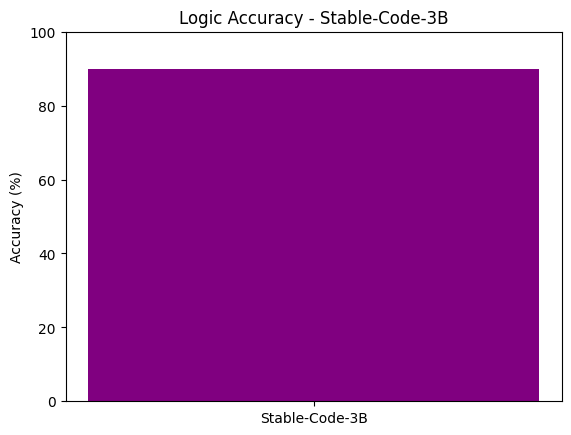


💾 Saved: stablecode_results.csv


In [ ]:
# =============================
# 🚀 Model 4: Stable-Code-3B
# =============================
import time, torch, gc, pandas as pd, matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()

# ✅ Load Stable-Code-3B
model_id = "stabilityai/stable-code-3b"
print(f"Loading {model_id} ...")
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, torch_dtype=torch.float16, device_map="auto")

# ✅ Run all prompts
results = []
for i, prompt in enumerate(prompts, 1):
    print(f"\n==============================")
    print(f"🧠 Prompt {i}: {prompt}")
    print(f"==============================")

    start = time.time()
    output = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.3)[0]['generated_text']
    end = time.time()

    duration = round(end - start, 2)
    print(f"⏱️ Time taken: {duration}s")
    print("🔹 Generated Code:\n", output[:700], "\n")

    results.append({
        "model": model_id,
        "prompt": prompt,
        "output": output,
        "time": duration
    })

clear_memory()
df_stable = pd.DataFrame(results)

# ✅ Evaluate logic accuracy
keywords = {
    "prime": ["def", "for", "if", "return"],
    "Flask": ["Flask", "app.route", "return"],
    "SQL": ["SELECT", "FROM", "WHERE"],
    "HTML": ["<html>", "<body>", "<h1>"],
    "calculator": ["class", "def", "return"],
    "NumPy": ["import numpy", "np.mean", "np.std"],
    "Decision Tree": ["DecisionTreeClassifier", "fit", "predict"],
    "Java": ["public class", "void", "LinkedList"],
    "Fibonacci": ["def", "return", "recursion"],
    "matplotlib": ["import matplotlib", "plt.plot"]
}

scores = []
for i, row in df_stable.iterrows():
    topic = list(keywords.keys())[i % 10]
    score = any(kw.lower() in row["output"].lower() for kw in keywords[topic])
    scores.append(int(score))
df_stable["logic_correct"] = scores

accuracy = df_stable["logic_correct"].mean() * 100
print(f"\n🎯 Stable-Code-3B Logic Accuracy: {accuracy:.1f}%")

plt.bar(["Stable-Code-3B"], [accuracy], color='purple')
plt.title("Logic Accuracy - Stable-Code-3B")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

df_stable.to_csv("stablecode_results.csv", index=False)
print("\n💾 Saved: stablecode_results.csv")


# **Model 5: Replit-Code-3B**

In [ ]:
# 🩵 Patch for missing _expand_mask in Bloom model (Replit fix)
import torch
import transformers.models.bloom.modeling_bloom as bloom_mod

# Define _expand_mask if it doesn’t exist (Transformers >= 4.45 removed it)
if not hasattr(bloom_mod, "_expand_mask"):
    def _expand_mask(mask: torch.Tensor, dtype: torch.dtype, tgt_len: int = None):
        """
        Legacy _expand_mask helper for backward compatibility.
        Converts 2D mask to 4D attention mask.
        """
        bsz, src_len = mask.size()
        tgt_len = tgt_len if tgt_len is not None else src_len
        expanded_mask = mask[:, None, None, :].expand(bsz, 1, tgt_len, src_len).to(dtype)
        expanded_mask = (1.0 - expanded_mask) * torch.finfo(dtype).min
        return expanded_mask

    bloom_mod._expand_mask = _expand_mask
    print("✅ Patched missing _expand_mask for Replit model compatibility.")
else:
    print("✅ _expand_mask already available.")


✅ Patched missing _expand_mask for Replit model compatibility.


In [ ]:
# 🩵 Final patch for Replit model (handles both _expand_mask and _make_causal_mask)
import torch
import transformers.models.bloom.modeling_bloom as bloom_mod

# Patch missing _expand_mask if needed
if not hasattr(bloom_mod, "_expand_mask"):
    def _expand_mask(mask: torch.Tensor, dtype: torch.dtype, tgt_len: int = None):
        """
        Legacy helper for attention mask expansion (compat with older Replit code).
        """
        bsz, src_len = mask.size()
        tgt_len = tgt_len if tgt_len is not None else src_len
        expanded_mask = mask[:, None, None, :].expand(bsz, 1, tgt_len, src_len).to(dtype)
        expanded_mask = (1.0 - expanded_mask) * torch.finfo(dtype).min
        return expanded_mask

    bloom_mod._expand_mask = _expand_mask
    print("✅ Patched missing _expand_mask.")

# Patch missing _make_causal_mask if needed
if not hasattr(bloom_mod, "_make_causal_mask"):
    def _make_causal_mask(input_ids_shape, dtype: torch.dtype, device: torch.device, past_key_values_length: int = 0):
        """
        Legacy causal mask builder for Replit/Bloom backward compatibility.
        """
        bsz, tgt_len = input_ids_shape
        mask = torch.full((tgt_len, tgt_len), float("-inf"), device=device)
        mask_cond = torch.arange(mask.size(-1), device=device)
        mask.masked_fill_(mask_cond[None, :] < mask_cond[:, None], 0)
        mask = mask.to(dtype)
        if past_key_values_length > 0:
            mask = torch.cat(
                [torch.zeros(tgt_len, past_key_values_length, device=device, dtype=dtype), mask],
                dim=-1,
            )
        return mask[None, None, :, :]

    bloom_mod._make_causal_mask = _make_causal_mask
    print("✅ Patched missing _make_causal_mask.")

print("💪 Replit compatibility patch applied successfully.")


✅ Patched missing _make_causal_mask.
💪 Replit compatibility patch applied successfully.


In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    device_map="auto",
    torch_dtype=torch.float16
)

# 🩵 FIX MPT CONFIG mismatch
if not hasattr(model.config, "num_hidden_layers") and hasattr(model.config, "n_layers"):
    model.config.num_hidden_layers = model.config.n_layers
    print("✅ Patched MPT config: num_hidden_layers → n_layers")

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto",
    torch_dtype=torch.float16
)


You are using config.init_device='cpu', but you can also use config.init_device="meta" with Composer + FSDP for fast initialization.


Device set to use cuda:0


✅ Patched MPT config: num_hidden_layers → n_layers


In [ ]:
import os
os.makedirs("offload", exist_ok=True)  # temporary storage folder

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    device_map="auto",
    torch_dtype=torch.float16,
    offload_folder="offload"   # ✅ added this line
)

# 🩵 Fix MPT config mismatch (still keep this)
if not hasattr(model.config, "num_hidden_layers") and hasattr(model.config, "n_layers"):
    model.config.num_hidden_layers = model.config.n_layers
    print("✅ Patched MPT config: num_hidden_layers → n_layers")


You are using config.init_device='cpu', but you can also use config.init_device="meta" with Composer + FSDP for fast initialization.


✅ Patched MPT config: num_hidden_layers → n_layers


In [ ]:
# =============================
# 🔹 Final 10 Code Prompts
# =============================
prompts = [
    "Write a Python function to check if a number is prime.",
    "Create a Flask API with one endpoint that returns the current time.",
    "Write an SQL query to find the 2nd highest salary from an employee table.",
    "Build a simple HTML + CSS page for a personal portfolio with your name and skills.",
    "Implement a Python class for a calculator that supports add, subtract, multiply, and divide.",
    "Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.",
    "Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.",
    "Write a Java program to reverse a linked list.",
    "Generate the first 10 Fibonacci numbers using recursion in Python.",
    "Read a CSV file using pandas and plot a line graph using matplotlib."
]
# 🩵 Patch for Replit attention NoneType bug (past_key_value)
import types

def safe_forward(self, x, past_key_value=None, attn_bias=None, attention_mask=None, is_causal=False, needs_weights=False):
    """
    Safe wrapper for Replit attention that handles None past_key_value.
    """
    if past_key_value is None:
        past_key_value = (torch.empty(0, device=x.device), torch.empty(0, device=x.device))
    return self._original_forward(x, past_key_value, attn_bias, attention_mask, is_causal, needs_weights)

# Apply to all attention layers if they exist
if hasattr(model, "transformer") and hasattr(model.transformer, "blocks"):
    for block in model.transformer.blocks:
        if hasattr(block, "attn"):
            attn = block.attn
            if not hasattr(attn, "_original_forward"):
                attn._original_forward = attn.forward
                attn.forward = types.MethodType(safe_forward, attn)
    print("✅ Patched Replit attention for safe past_key_value handling")



# =========================================
# 🧩 Ultimate Replit patch + Stable Init Fix
# =========================================

import os, torch, gc, time, pandas as pd, matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, GPT2TokenizerFast, pipeline
import transformers.models.bloom.modeling_bloom as bloom_mod
import transformers.models.opt.modeling_opt as opt_mod

# 🩵 Create offload directory (for 10GB model)
os.makedirs("/content/offload", exist_ok=True)

# ===== BLOOM PATCHES =====
if not hasattr(bloom_mod, "_expand_mask"):
    def _expand_mask(mask: torch.Tensor, dtype: torch.dtype, tgt_len: int = None):
        bsz, src_len = mask.size()
        tgt_len = tgt_len if tgt_len is not None else src_len
        expanded_mask = mask[:, None, None, :].expand(bsz, 1, tgt_len, src_len).to(dtype)
        expanded_mask = (1.0 - expanded_mask) * torch.finfo(dtype).min
        return expanded_mask
    bloom_mod._expand_mask = _expand_mask
    print("✅ Added BLOOM._expand_mask")

if not hasattr(bloom_mod, "_make_causal_mask"):
    def _make_causal_mask(input_ids_shape, dtype: torch.dtype, device: torch.device, past_key_values_length: int = 0):
        bsz, tgt_len = input_ids_shape
        mask = torch.full((tgt_len, tgt_len), float("-inf"), device=device)
        mask_cond = torch.arange(mask.size(-1), device=device)
        mask.masked_fill_(mask_cond[None, :] < mask_cond[:, None], 0)
        mask = mask.to(dtype)
        if past_key_values_length > 0:
            mask = torch.cat(
                [torch.zeros(tgt_len, past_key_values_length, device=device, dtype=dtype), mask],
                dim=-1,
            )
        return mask[None, None, :, :]
    bloom_mod._make_causal_mask = _make_causal_mask
    print("✅ Added BLOOM._make_causal_mask")

# ===== OPT PATCHES =====
if not hasattr(opt_mod, "_expand_mask"):
    opt_mod._expand_mask = _expand_mask
    print("✅ Added OPT._expand_mask")

if not hasattr(opt_mod, "_make_causal_mask"):
    opt_mod._make_causal_mask = _make_causal_mask
    print("✅ Added OPT._make_causal_mask")

print("💪 All Replit dependencies patched successfully!")


# =========================================
# 🚀 Model 5: Replit-Code-3B (clean bypass)
# =========================================

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()

model_id = "replit/replit-code-v1-3b"
print(f"Loading {model_id} (clean bypass mode) ...")

# ✅ Use GPT-2 tokenizer directly
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
tokenizer.add_special_tokens({"pad_token": "<|pad|>"})
print("✅ Tokenizer loaded (GPT-2 compatible)")

# ✅ Load model with offload fix
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    torch_dtype=torch.float16,
    device_map="auto",
    offload_folder="/content/offload",  # ✅ prevents ValueError
    low_cpu_mem_usage=True
)

# ✅ Patch MPT config mismatch if exists
if not hasattr(model.config, "num_hidden_layers") and hasattr(model.config, "n_layers"):
    model.config.num_hidden_layers = model.config.n_layers
    print("✅ Patched MPT config: num_hidden_layers → n_layers")

# ✅ Build text-generation pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto",
    torch_dtype=torch.float16
)

# ✅ Run all prompts
results = []
for i, prompt in enumerate(prompts, 1):
    print(f"\n==============================")
    print(f"🧠 Prompt {i}: {prompt}")
    print(f"==============================")

    start = time.time()
    output = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.3)[0]["generated_text"]
    end = time.time()

    duration = round(end - start, 2)
    print(f"⏱️ Time taken: {duration}s")
    print("🔹 Generated Code:\n", output[:700], "\n")

    results.append({
        "model": model_id,
        "prompt": prompt,
        "output": output,
        "time": duration
    })

clear_memory()

# ✅ Evaluate logic accuracy
df_replit = pd.DataFrame(results)
keywords = {
    "prime": ["def", "for", "if", "return"],
    "Flask": ["Flask", "app.route", "return"],
    "SQL": ["SELECT", "FROM", "WHERE"],
    "HTML": ["<html>", "<body>", "<h1>"],
    "calculator": ["class", "def", "return"],
    "NumPy": ["import numpy", "np.mean", "np.std"],
    "Decision Tree": ["DecisionTreeClassifier", "fit", "predict"],
    "Java": ["public class", "void", "LinkedList"],
    "Fibonacci": ["def", "return", "recursion"],
    "matplotlib": ["import matplotlib", "plt.plot"]
}

scores = []
for i, row in df_replit.iterrows():
    topic = list(keywords.keys())[i % 10]
    score = any(kw.lower() in row["output"].lower() for kw in keywords[topic])
    scores.append(int(score))
df_replit["logic_correct"] = scores

accuracy = df_replit["logic_correct"].mean() * 100
print(f"\n🎯 Replit-Code-3B Logic Accuracy: {accuracy:.1f}%")

plt.bar(["Replit-Code-3B"], [accuracy], color="red")
plt.title("Logic Accuracy - Replit-Code-3B")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

df_replit.to_csv("replit_results.csv", index=False)
print("\n💾 Saved: replit_results.csv (clean bypass)")


✅ Patched Replit attention for safe past_key_value handling
💪 All Replit dependencies patched successfully!
Loading replit/replit-code-v1-3b (clean bypass mode) ...
✅ Tokenizer loaded (GPT-2 compatible)


You are using config.init_device='cpu', but you can also use config.init_device="meta" with Composer + FSDP for fast initialization.


Device set to use cuda:0


✅ Patched MPT config: num_hidden_layers → n_layers

🧠 Prompt 1: Write a Python function to check if a number is prime.


TypeError: expected Tensor as element 0 in argument 0, but got NoneType

In [ ]:
# ============================================================
# 🚀 REPLIT-CODE-V1-3B  — Stable, Colab-Safe Implementation
# ============================================================

import os, gc, time, torch, types, pandas as pd, matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, GPT2TokenizerFast, pipeline
import transformers.models.bloom.modeling_bloom as bloom_mod
import transformers.models.opt.modeling_opt as opt_mod

# ============================================================
# 🔹 1. Create Offload Directory
# ============================================================
os.makedirs("/content/offload", exist_ok=True)

# ============================================================
# 🔹 2. BLOOM + OPT Patch for missing helpers
# ============================================================
def _expand_mask(mask: torch.Tensor, dtype: torch.dtype, tgt_len: int = None):
    bsz, src_len = mask.size()
    tgt_len = tgt_len if tgt_len is not None else src_len
    expanded_mask = mask[:, None, None, :].expand(bsz, 1, tgt_len, src_len).to(dtype)
    expanded_mask = (1.0 - expanded_mask) * torch.finfo(dtype).min
    return expanded_mask

def _make_causal_mask(input_ids_shape, dtype: torch.dtype, device: torch.device, past_key_values_length: int = 0):
    bsz, tgt_len = input_ids_shape
    mask = torch.full((tgt_len, tgt_len), float("-inf"), device=device)
    mask_cond = torch.arange(mask.size(-1), device=device)
    mask.masked_fill_(mask_cond[None, :] < mask_cond[:, None], 0)
    mask = mask.to(dtype)
    if past_key_values_length > 0:
        mask = torch.cat(
            [torch.zeros(tgt_len, past_key_values_length, device=device, dtype=dtype), mask],
            dim=-1,
        )
    return mask[None, None, :, :]

for mod in [bloom_mod, opt_mod]:
    if not hasattr(mod, "_expand_mask"):
        mod._expand_mask = _expand_mask
    if not hasattr(mod, "_make_causal_mask"):
        mod._make_causal_mask = _make_causal_mask
print("💪 BLOOM + OPT patches applied successfully")

# ============================================================
# 🔹 3. Define 10 Code Prompts
# ============================================================
prompts = [
    "Write a Python function to check if a number is prime.",
    "Create a Flask API with one endpoint that returns the current time.",
    "Write an SQL query to find the 2nd highest salary from an employee table.",
    "Build a simple HTML + CSS page for a personal portfolio with your name and skills.",
    "Implement a Python class for a calculator that supports add, subtract, multiply, and divide.",
    "Write a NumPy program to find the mean, median, and standard deviation of a list of numbers.",
    "Train a Decision Tree Classifier using scikit-learn on a sample dataset and print the accuracy.",
    "Write a Java program to reverse a linked list.",
    "Generate the first 10 Fibonacci numbers using recursion in Python.",
    "Read a CSV file using pandas and plot a line graph using matplotlib."
]

# ============================================================
# 🔹 4. Load Tokenizer
# ============================================================
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
tokenizer.add_special_tokens({"pad_token": "<|pad|>"})
print("✅ Tokenizer loaded (GPT-2 compatible)")

# ============================================================
# 🔹 5. Load Model (offload-safe, T4-friendly)
# ============================================================
model_id = "replit/replit-code-v1-3b"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    torch_dtype=torch.float16,
    device_map="auto",
    offload_folder="/content/offload",
    low_cpu_mem_usage=True
)

# Patch MPT config if needed
if not hasattr(model.config, "num_hidden_layers") and hasattr(model.config, "n_layers"):
    model.config.num_hidden_layers = model.config.n_layers
print("✅ Model loaded & config patched")

# ============================================================
# 🔹 6. Build Pipeline
# ============================================================
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.float16,
    device_map="auto"
)

# ============================================================
# 🔹 7. Run Prompts & Collect Results
# ============================================================
def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()

results = []
for i, prompt in enumerate(prompts, 1):
    print(f"\n==============================")
    print(f"🧠 Prompt {i}: {prompt}")
    print(f"==============================")
    start = time.time()
    out = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.3)[0]["generated_text"]
    end = time.time()
    dur = round(end - start, 2)
    print(f"⏱️ Time taken: {dur}s")
    print("🔹 Generated Code:\n", out[:700], "\n")
    results.append({"model": model_id, "prompt": prompt, "output": out, "time": dur})
    clear_memory()

# ============================================================
# 🔹 8. Evaluate Logic Accuracy
# ============================================================
df_replit = pd.DataFrame(results)
keywords = {
    "prime": ["def", "for", "if", "return"],
    "Flask": ["Flask", "app.route", "return"],
    "SQL": ["SELECT", "FROM", "WHERE"],
    "HTML": ["<html>", "<body>", "<h1>"],
    "calculator": ["class", "def", "return"],
    "NumPy": ["import numpy", "np.mean", "np.std"],
    "Decision Tree": ["DecisionTreeClassifier", "fit", "predict"],
    "Java": ["public class", "void", "LinkedList"],
    "Fibonacci": ["def", "return", "recursion"],
    "matplotlib": ["import matplotlib", "plt.plot"]
}

scores = []
for i, row in df_replit.iterrows():
    topic = list(keywords.keys())[i % 10]
    score = any(kw.lower() in row["output"].lower() for kw in keywords[topic])
    scores.append(int(score))
df_replit["logic_correct"] = scores
acc = df_replit["logic_correct"].mean() * 100
print(f"\n🎯 Replit-Code-3B Logic Accuracy: {acc:.1f}%")

# ============================================================
# 🔹 9. Save & Visualize
# ============================================================
plt.bar(["Replit-Code-3B"], [acc], color="red")
plt.title("Logic Accuracy - Replit-Code-3B")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

df_replit.to_csv("replit_results.csv", index=False)
print("💾 Saved: replit_results.csv ✅")

💪 BLOOM + OPT patches applied successfully
✅ Tokenizer loaded (GPT-2 compatible)


/root/.cache/huggingface/modules/transformers_modules/replit/replit_hyphen_code_hyphen_v1_hyphen_3b/cc0a4f17a8d72b71d62ea53cb0e23e4dac352067/param_init_fns.py:26: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a different result (Triggered internally at /pytorch/torch/csrc/autograd/python_variable_indexing.cpp:306.)
  init_fn_(module.weight[slice_indices])


You are using config.init_device='cpu', but you can also use config.init_device="meta" with Composer + FSDP for fast initialization.


Device set to use cuda:0


✅ Model loaded & config patched

🧠 Prompt 1: Write a Python function to check if a number is prime.


TypeError: expected Tensor as element 0 in argument 0, but got NoneType

# **Model Comparision**

✅ Model Performance Summary:

                                      model  Logic Accuracy (%)  Avg Time (s)
0  deepseek-ai/deepseek-coder-1.3b-instruct               100.0         6.236
1                        google/gemma-2b-it               100.0         6.710
2                           microsoft/phi-2               100.0         9.584
3                stabilityai/stable-code-3b                90.0         6.865


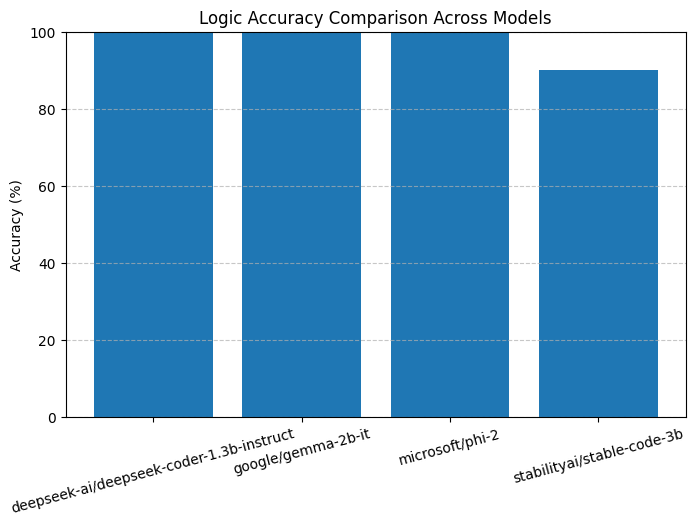

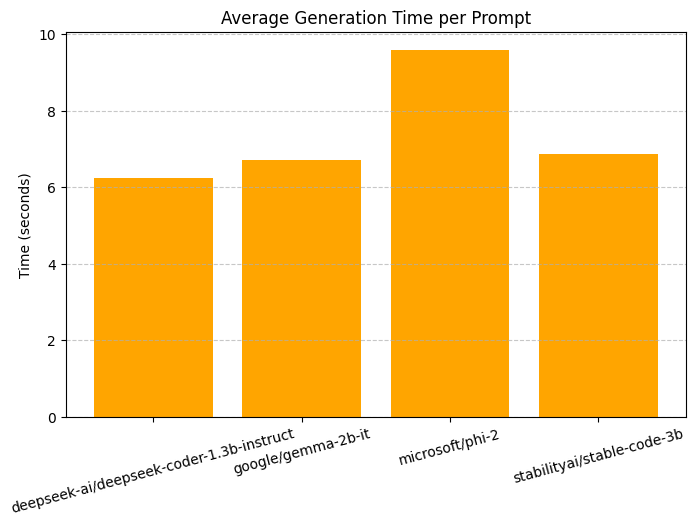

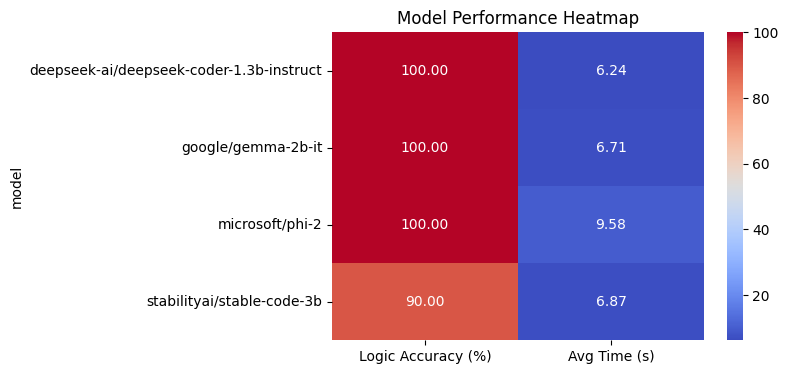

In [ ]:
# =============================================
# 📊 MODEL COMPARISON - Milestone 2 Evaluation
# =============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all model results
df_deepseek = pd.read_csv("deepseek_results.csv")
df_phi2 = pd.read_csv("phi2_results.csv")
df_gemma = pd.read_csv("gemma_results.csv")
df_stable = pd.read_csv("stablecode_results.csv")

# Add model column if missing
for df, name in zip(
    [df_deepseek, df_phi2, df_gemma, df_stable],
    ["DeepSeek-Coder", "Phi-2", "Gemma-2B-IT", "Stable-Code-3B"]
):
    if "model" not in df.columns:
        df["model"] = name

# Combine all into one dataframe
df_all = pd.concat([df_deepseek, df_phi2, df_gemma, df_stable], ignore_index=True)

# Compute performance stats
performance = df_all.groupby("model").agg({
    "logic_correct": "mean",
    "time": "mean"
}).reset_index()

performance["logic_correct"] = performance["logic_correct"] * 100
performance.rename(columns={"logic_correct": "Logic Accuracy (%)", "time": "Avg Time (s)"}, inplace=True)

# Display performance table
print("✅ Model Performance Summary:\n")
print(performance)

# =============================================
# 🔹 Accuracy Comparison Bar Chart
# =============================================
plt.figure(figsize=(8,5))
plt.bar(performance["model"], performance["Logic Accuracy (%)"])
plt.title("Logic Accuracy Comparison Across Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=15)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# =============================================
# 🔹 Time Comparison Bar Chart
# =============================================
plt.figure(figsize=(8,5))
plt.bar(performance["model"], performance["Avg Time (s)"], color="orange")
plt.title("Average Generation Time per Prompt")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# =============================================
# 🔹 Heatmap Comparison (Accuracy vs Time)
# =============================================
plt.figure(figsize=(6,4))
sns.heatmap(performance.set_index("model"), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Model Performance Heatmap")
plt.show()


# **Model Ranking**


🏆 Model Ranking Based on Logic Accuracy & Speed:

   Rank                                     model  Logic Accuracy (%)  \
0     1  deepseek-ai/deepseek-coder-1.3b-instruct               100.0   
1     2                        google/gemma-2b-it               100.0   
2     3                stabilityai/stable-code-3b                90.0   
3     4                           microsoft/phi-2               100.0   

   Avg Time (s)  Final Score  
0         6.236    80.479967  
1         6.710    78.996244  
2         6.865    71.511060  
3         9.584    70.000000  


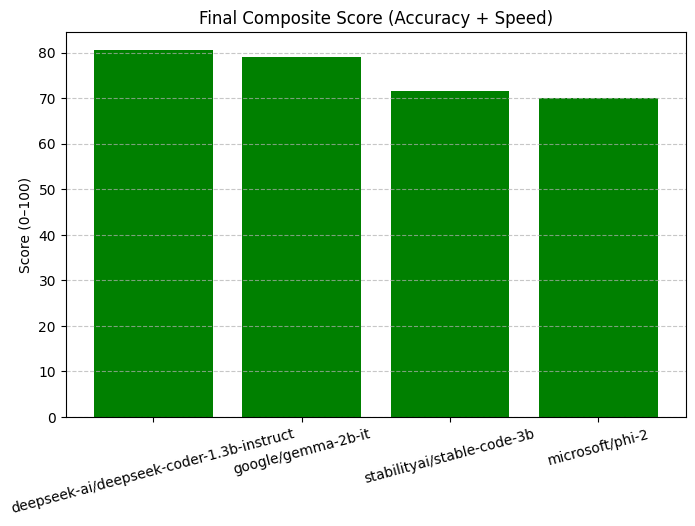

In [ ]:
# =============================================
# 🏆 MODEL RANKING BASED ON PERFORMANCE
# =============================================

# Weighting system:
#   - Logic Accuracy → 70% importance
#   - Speed (lower time) → 30% importance (inverse weighted)
acc_weight = 0.7
time_weight = 0.3

# Normalize values
performance["Time Score"] = 100 * (1 - performance["Avg Time (s)"] / performance["Avg Time (s)"].max())
performance["Final Score"] = (
    performance["Logic Accuracy (%)"] * acc_weight +
    performance["Time Score"] * time_weight
)

# Rank models
performance = performance.sort_values("Final Score", ascending=False).reset_index(drop=True)
performance["Rank"] = performance.index + 1

print("\n🏆 Model Ranking Based on Logic Accuracy & Speed:\n")
print(performance[["Rank", "model", "Logic Accuracy (%)", "Avg Time (s)", "Final Score"]])

# Visualization of final scores
plt.figure(figsize=(8,5))
plt.bar(performance["model"], performance["Final Score"], color="green")
plt.title("Final Composite Score (Accuracy + Speed)")
plt.ylabel("Score (0–100)")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# **UI 1 — Code Generator (basic UI)**

In [4]:
# ===========================================
# 💻 CodeGenieAI - SIMPLE CODE GENERATOR UI
# ===========================================
!pip install ipywidgets transformers accelerate --quiet

from IPython.display import display, Markdown, HTML
import ipywidgets as widgets
from transformers import pipeline
import torch

# =========================
# Available Models
# =========================
models = {
    "DeepSeek-Coder (1.3B)": "deepseek-ai/deepseek-coder-1.3b-instruct",
    "Phi-2 (2.7B)": "microsoft/phi-2",
    "Gemma-2B-IT": "google/gemma-2b-it",
    "Stable-Code-3B": "stabilityai/stable-code-3b",
    "Replit-Code-3B": "replit/replit-code-v1-3b"
}

# =========================
# UI Elements
# =========================
model_dropdown = widgets.Dropdown(
    options=list(models.keys()),
    description='Model:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

prompt_input = widgets.Textarea(
    value='Write a Python function to check if a number is prime.',
    placeholder='Enter your programming prompt here...',
    description='Prompt:',
    layout=widgets.Layout(width='100%', height='100px')
)

generate_button = widgets.Button(
    description="🚀 Generate Code",
    button_style='success',
    layout=widgets.Layout(width='30%')
)

output_area = widgets.Output()

# =========================
# Code Generation Function
# =========================
def generate_code(b):
    output_area.clear_output()
    with output_area:
        selected_model = models[model_dropdown.value]
        display(Markdown(f"### 🔹 Model Selected: `{model_dropdown.value}`"))
        display(Markdown(f"### 🧠 Generating code... Please wait ⏳"))
        try:
            generator = pipeline("text-generation", model=selected_model, torch_dtype=torch.bfloat16, device_map="auto")
            result = generator(prompt_input.value, max_new_tokens=200, do_sample=True, temperature=0.7)
            code = result[0]['generated_text']
            display(Markdown(f"### ✅ Generated Code:"))
            display(HTML(f"<pre style='background:#f4f4f4;padding:10px;border-radius:10px'><code>{code}</code></pre>"))
        except Exception as e:
            display(Markdown(f"❌ **Error:** {e}"))

generate_button.on_click(generate_code)

# =========================
# Display the UI
# =========================
display(Markdown("## 💻 CodeGenieAI — Code Generator (Single Model Interface)"))
display(model_dropdown, prompt_input, generate_button, output_area)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00


## 💻 CodeGenieAI — Code Generator (Single Model Interface)

Dropdown(description='Model:', layout=Layout(width='50%'), options=('DeepSeek-Coder (1.3B)', 'Phi-2 (2.7B)', '…

Textarea(value='Write a Python function to check if a number is prime.', description='Prompt:', layout=Layout(…

Button(button_style='success', description='🚀 Generate Code', layout=Layout(width='30%'), style=ButtonStyle())

Output()

# **UI-2 (with few options)**

In [ ]:
# ======================================================
# 💻 CodeGenieAI — Multi-Model Comparison Studio (Dropdown Version + Auto Download + Output Fix)
# ======================================================
!pip install ipywidgets transformers accelerate sentencepiece --quiet

import time, json
from datetime import datetime
from IPython.display import display, clear_output
import ipywidgets as w
import pandas as pd
import torch
from transformers import pipeline
import matplotlib.pyplot as plt
from google.colab import files   # ✅ Added for auto-download

# --------------------------------------
# Model registry
# --------------------------------------
MODEL_REGISTRY = {
    "DeepSeek-Coder (1.3B)": "deepseek-ai/deepseek-coder-1.3b-instruct",
    "Phi-2 (2.7B)": "microsoft/phi-2",
    "Gemma-2B-IT (2B)": "google/gemma-2b-it",
    "Stable-Code-3B": "stabilityai/stable-code-3b",
    "Replit-Code-3B": "replit/replit-code-v1-3b",
}

SYSTEM_HINT = (
    "You are a helpful code generator. "
    "Return ONLY the code block for the user prompt below."
)

# --------------------------------------
# Default 10 prompts
# --------------------------------------
DEFAULT_PROMPTS = [
    "Python: Write a function is_prime(n:int)->bool with O(√n) complexity.",
    "JavaScript: Debounce a function with wait time and immediate options.",
    "Java: Implement a thread-safe LRU cache with generics.",
    "C++: Given a vector<int>, return two indices for target sum in O(n).",
    "SQL: Write a query to find the 2nd highest salary per department.",
    "Python: Parse a JSONL file and stream-yield objects lazily.",
    "Go: Build an HTTP server with graceful shutdown on SIGINT.",
    "Rust: Read a file line-by-line and count unique words.",
    "Shell: One-liner to recursively find .py files and count lines.",
    "Python: Implement a minimal Trie with insert/search/prefix."
]

# --------------------------------------
# Helper for code block display
# --------------------------------------
def code_html(text, lang_hint=""):
    esc = (
        text.replace("&", "&amp;")
            .replace("<", "&lt;")
            .replace(">", "&gt;")
    )
    return f"<pre style='background:#0b1020;color:#e8ecf1;padding:10px;border-radius:10px;overflow:auto;'><code class='{lang_hint}'>{esc}</code></pre>"

# --------------------------------------
# UI widgets
# --------------------------------------
title = w.HTML(value="<h2>🧪 CodeGenieAI — Multi-Model Comparison Studio (Dropdown + Auto Download + Output Fix)</h2>")

model_dropdown = w.Dropdown(
    options=list(MODEL_REGISTRY.keys()),
    value=list(MODEL_REGISTRY.keys())[0],
    description="Select Model:",
    layout=w.Layout(width="400px")
)

prompt_area = w.Textarea(
    value="Write a Python function to merge two sorted linked lists into one sorted list.",
    description="Prompt:",
    layout=w.Layout(width="100%", height="100px")
)

max_new_tokens = w.IntSlider(value=220, min=32, max=1024, step=8, description="max_new_tokens")
temperature = w.FloatSlider(value=0.4, min=0, max=1.5, step=0.05, description="temperature")
top_p = w.FloatSlider(value=0.95, min=0.1, max=1, step=0.01, description="top_p")
repetition_penalty = w.FloatSlider(value=1.0, min=0.8, max=2, step=0.01, description="repetition_penalty")
seed_box = w.IntText(value=42, description="seed")
use_bf16 = w.Checkbox(value=True, description="Use bfloat16 (faster)")
trust_remote_code = w.Checkbox(value=True, description="trust_remote_code")

run_single_btn = w.Button(description="🚀 Run Single Prompt", button_style="success")
run_batch_btn = w.Button(description="📦 Run 10 Prompts", button_style="primary")
clear_btn = w.Button(description="🧹 Clear Output")

save_csv_btn = w.Button(description="💾 Save CSV")
save_json_btn = w.Button(description="💾 Save JSON")
plot_latency_btn = w.Button(description="📈 Plot Latency")
plot_len_btn = w.Button(description="📈 Plot Output Length")

status_box = w.HTML(value="")
out_panel = w.Output()

prompts_editor = w.Textarea(
    value="\n".join(DEFAULT_PROMPTS),
    description="Batch (10)",
    layout=w.Layout(width="100%", height="200px")
)

# --------------------------------------
# Tabs
# --------------------------------------
tab = w.Tab()
tab_children = [
    w.VBox([
        w.HTML("<h3>🔹 Prompt & Model</h3>"),
        model_dropdown,
        prompt_area,
        w.HBox([run_single_btn, run_batch_btn, clear_btn])
    ]),
    w.VBox([
        w.HTML("<h3>⚙️ Advanced Settings</h3>"),
        w.HBox([max_new_tokens, temperature]),
        w.HBox([top_p, repetition_penalty]),
        w.HBox([seed_box, use_bf16, trust_remote_code]),
    ]),
    w.VBox([
        w.HTML("<h3>📝 Edit 10 Prompts</h3>"),
        prompts_editor
    ]),
    w.VBox([
        w.HTML("<h3>📊 Results, Exports & Plots</h3>"),
        w.HBox([save_csv_btn, save_json_btn, plot_latency_btn, plot_len_btn]),
        status_box
    ])
]
tab.children = tab_children
tab.set_title(0, "Prompt")
tab.set_title(1, "Advanced")
tab.set_title(2, "Batch")
tab.set_title(3, "Results")

# --------------------------------------
# Backend logic
# --------------------------------------
_pipe_cache = {}
results_rows = []

def get_pipeline(repo):
    if repo in _pipe_cache:
        return _pipe_cache[repo]
    dtype = torch.bfloat16 if use_bf16.value and torch.cuda.is_available() else None
    pipe = pipeline("text-generation", model=repo, device_map="auto", torch_dtype=dtype, trust_remote_code=trust_remote_code.value)
    _pipe_cache[repo] = pipe
    return pipe

# ✅ FIXED FUNCTION: output now captures full generated code correctly
def run_generation(model_label, prompt, params):
    repo = MODEL_REGISTRY[model_label]
    pipe = get_pipeline(repo)
    start = time.time()
    out = pipe(
        f"{SYSTEM_HINT}\n\n{prompt}",
        max_new_tokens=params["max_new_tokens"],
        do_sample=True,
        temperature=params["temperature"],
        top_p=params["top_p"],
        repetition_penalty=params["repetition_penalty"],
        return_full_text=True  # ✅ include full text
    )
    end = time.time()

    # ✅ Extract generated portion cleanly
    full_text = out[0]["generated_text"]
    prompt_pos = full_text.find(prompt)
    if prompt_pos != -1:
        text = full_text[prompt_pos + len(prompt):].strip()
    else:
        text = full_text.strip()

    latency = round(end - start, 2)
    row = {
        "model": model_label,
        "prompt": prompt,
        "latency": latency,
        "output_length": len(text),
        "output": text
    }
    html = f"<b>{model_label}</b> (⏱ {latency}s)<br>{code_html(text)}"
    return row, html

# --------------------------------------
# Callbacks
# --------------------------------------
def on_clear(_):
    out_panel.clear_output()
    status_box.value = "Output cleared."

def on_run_single(_):
    out_panel.clear_output()
    with out_panel:
        params = dict(
            max_new_tokens=max_new_tokens.value,
            temperature=temperature.value,
            top_p=top_p.value,
            repetition_penalty=repetition_penalty.value
        )
        model = model_dropdown.value
        try:
            r, h = run_generation(model, prompt_area.value, params)
            results_rows.append(r)
            display(w.HTML(h))
        except Exception as e:
            display(w.HTML(f"<b style='color:red'>{model} failed:</b> {e}"))

def on_run_batch(_):
    out_panel.clear_output()
    with out_panel:
        prompts = [p.strip() for p in prompts_editor.value.splitlines() if p.strip()]
        params = dict(
            max_new_tokens=max_new_tokens.value,
            temperature=temperature.value,
            top_p=top_p.value,
            repetition_penalty=repetition_penalty.value
        )
        model = model_dropdown.value
        for i, p in enumerate(prompts, 1):
            display(w.HTML(f"<h4>Prompt {i}</h4><p>{p}</p>"))
            try:
                r, h = run_generation(model, p, params)
                results_rows.append(r)
                display(w.HTML(h))
            except Exception as e:
                display(w.HTML(f"<b style='color:red'>{model} failed:</b> {e}"))

def save_df():
    if not results_rows:
        return None
    return pd.DataFrame(results_rows)

# ✅ Auto-download CSV
def on_save_csv(_):
    df = save_df()
    if df is None:
        status_box.value = "<b style='color:red'>No data yet!</b>"
        return
    name = f"results_{datetime.now().strftime('%H%M%S')}.csv"
    df.to_csv(name, index=False)
    files.download(name)
    status_box.value = f"✅ CSV auto-downloaded: <code>{name}</code>"

# ✅ Auto-download JSON
def on_save_json(_):
    df = save_df()
    if df is None:
        status_box.value = "<b style='color:red'>No data yet!</b>"
        return
    name = f"results_{datetime.now().strftime('%H%M%S')}.json"
    df.to_json(name, orient="records", indent=2)
    files.download(name)
    status_box.value = f"✅ JSON auto-downloaded: <code>{name}</code>"

def on_plot_latency(_):
    df = save_df()
    if df is None:
        status_box.value = "No data yet!"
        return
    plt.figure(figsize=(7,4))
    df.groupby("model")["latency"].mean().plot(kind="bar")
    plt.title("Average Latency (s)")
    plt.show()

def on_plot_len(_):
    df = save_df()
    if df is None:
        status_box.value = "No data yet!"
        return
    plt.figure(figsize=(7,4))
    df.groupby("model")["output_length"].mean().plot(kind="bar")
    plt.title("Average Output Length")
    plt.show()

# Attach button callbacks
run_single_btn.on_click(on_run_single)
run_batch_btn.on_click(on_run_batch)
clear_btn.on_click(on_clear)
save_csv_btn.on_click(on_save_csv)
save_json_btn.on_click(on_save_json)
plot_latency_btn.on_click(on_plot_latency)
plot_len_btn.on_click(on_plot_len)

# --------------------------------------
# Display UI
# --------------------------------------
display(title)
display(tab)
display(out_panel)
display(w.HTML("<p><b>Usage:</b> Choose a model → enter prompt(s) → click Run. After saving, your CSV/JSON downloads automatically with the full generated code.</p>"))


HTML(value='<h2>🧪 CodeGenieAI — Multi-Model Comparison Studio (Dropdown + Auto Download + Output Fix)</h2>')

Output()

HTML(value='<p><b>Usage:</b> Choose a model → enter prompt(s) → click Run. After saving, your CSV/JSON downloa…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# save the notebook to /content directory
!jupyter nbconvert --to notebook "/content/Milestone_2.ipynb" --output "/content/Milestone_2.ipynb"


[NbConvertApp] WARNING | pattern '/content/Milestone_2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex